## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedDF = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combinedDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
miceNum = combinedDF['Mouse ID'].nunique()
miceNum

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateDF = combinedDF.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicateIDDF = combinedDF.loc[duplicateDF, 'Mouse ID'].unique()
duplicateIDDF

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedData = combinedDF.loc[combinedDF['Mouse ID'] == 'g989',:]
duplicatedData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = combinedDF[combinedDF['Mouse ID'].isin(duplicateIDDF) == False]
cleanDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
miceNumClean = cleanDF['Mouse ID'].nunique()
miceNumClean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleanDF['Tumor Volume (mm3)'].groupby(cleanDF['Drug Regimen']).mean()
median = cleanDF['Tumor Volume (mm3)'].groupby(cleanDF['Drug Regimen']).median()
var = cleanDF['Tumor Volume (mm3)'].groupby(cleanDF['Drug Regimen']).var()
std = cleanDF['Tumor Volume (mm3)'].groupby(cleanDF['Drug Regimen']).std()
sem = cleanDF['Tumor Volume (mm3)'].groupby(cleanDF['Drug Regimen']).sem()

summaryStats = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summaryStats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summaryStatsAgg = cleanDF.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summaryStatsAgg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

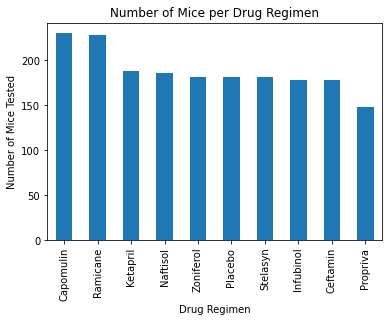

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Count per regimen
micePerRegimen = cleanDF ['Drug Regimen'].value_counts()

# Creating plot
barPlot = micePerRegimen.plot.bar()

# Naming labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

plt.show()

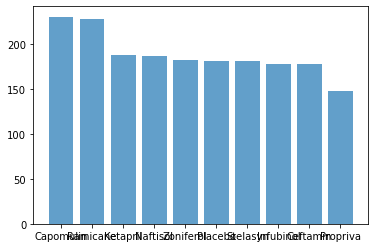

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Getting axis values
x_axis = micePerRegimen.index.values
y_axis = micePerRegimen.values

# Creating plot
plt.bar(x_axis, y_axis, alpha = .7, align = 'center')

plt.show()

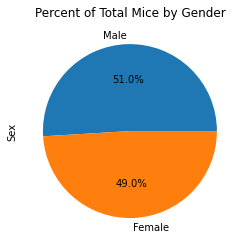

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Counts by gender
miceByGender = cleanDF['Sex'].value_counts()

# Creating plot
piePlot = miceByGender.plot.pie(autopct='%1.1f%%')

# Naming labels
plt.title('Percent of Total Mice by Gender')

plt.show()

In [13]:
# Getting percent by gender for pyplot
total = miceByGender.sum()
femalePercent = (miceByGender['Female']/total)*100
malePercent = (miceByGender['Male']/total)*100
print(f"Female %: {femalePercent}, Male %: {malePercent}")

Female %: 49.04255319148936, Male %: 50.95744680851064


Text(0.5, 1.0, 'Percent of Total Mice by Gender')

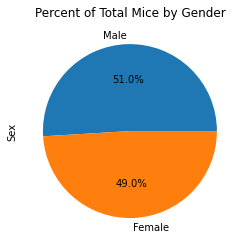

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Setting lables and sizing
labels = ['Female','Male']
sizes = [femalePercent, malePercent]

# Creating Plot
plot = miceByGender.plot.pie(y=total,autopct='%1.1f%%')

# Naming lables
plt.title('Percent of Total Mice by Gender')


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Adding Capomulin, Ramicane, Infubinol, and Ceftamin into lists
capomulinDF = cleanDF.loc[cleanDF["Drug Regimen"] == "Capomulin",:]
ramicaneDF = cleanDF.loc[cleanDF["Drug Regimen"] == "Ramicane", :]
infubinolDF = cleanDF.loc[cleanDF["Drug Regimen"] == "Infubinol", :]
ceftaminDF = cleanDF.loc[cleanDF["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
maxTime = cleanDF.groupby(["Mouse ID"])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedDF = pd.merge(maxTime, cleanDF, on=("Mouse ID","Timepoint"),how="left")
mergedDF

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol = mergedDF.loc[mergedDF['Drug Regimen'] == treatment]['Tumor Volume (mm3)']  
     
    # adding subset to the volume list
    tumorVolData.append(vol)
    
    # Getting necessary metrics
    quartile = vol.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
        
    # Determine outliers using upper and lower bounds
    lowerBound = lower - (1.5*iqr)
    upperBound = upper + (1.5*iqr)
    outliers = vol.loc[(vol > upperBound) | (vol < lowerBound)]
    print(f"{treatment}'s potential outliers: {outliers}.")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


C:\Users\isidh\AppData\Local\Temp/ipykernel_25792/3472546812.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


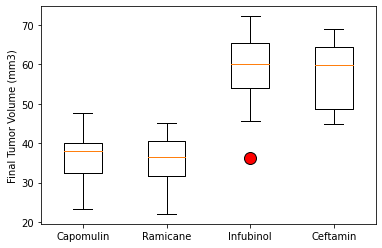

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
ax1.boxplot(tumorVolData, flierprops = dict(markerfacecolor='red', marker='o', markersize='12'))
plt.show()

## Line and Scatter Plots

In [57]:
# Creating a list to pick a unique Mouse ID for Capomulin
idCheck = cleanDF.loc[cleanDF['Drug Regimen'] == "Capomulin",['Mouse ID','Drug Regimen']].drop_duplicates().values
idCheck

array([['s185', 'Capomulin'],
       ['x401', 'Capomulin'],
       ['m601', 'Capomulin'],
       ['f966', 'Capomulin'],
       ['u364', 'Capomulin'],
       ['y793', 'Capomulin'],
       ['r554', 'Capomulin'],
       ['m957', 'Capomulin'],
       ['t565', 'Capomulin'],
       ['i738', 'Capomulin'],
       ['w914', 'Capomulin'],
       ['g288', 'Capomulin'],
       ['l897', 'Capomulin'],
       ['b742', 'Capomulin'],
       ['b128', 'Capomulin'],
       ['j246', 'Capomulin'],
       ['j119', 'Capomulin'],
       ['w150', 'Capomulin'],
       ['v923', 'Capomulin'],
       ['g316', 'Capomulin'],
       ['s710', 'Capomulin'],
       ['l509', 'Capomulin'],
       ['r944', 'Capomulin'],
       ['i557', 'Capomulin'],
       ['r157', 'Capomulin']], dtype=object)

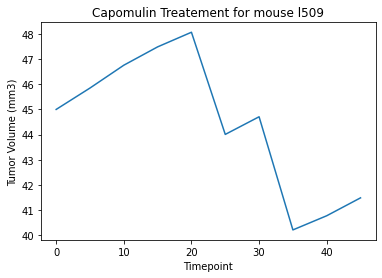

In [60]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineDF = capomulinDF.loc[capomulinDF["Mouse ID"] == "l509",:]

# Setting x and y axis
x_axis = lineDF['Timepoint']
y_axis = lineDF['Tumor Volume (mm3)']

# Creating Plot
plt.plot(x_axis, y_axis)
plt.title("Capomulin Treatement for mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

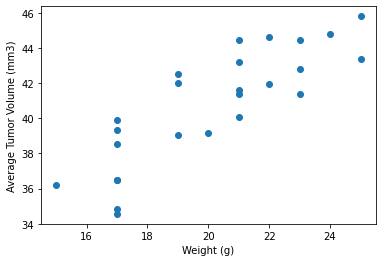

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Creating DF to group by average
avgCapomulinVol = capomulinDF.groupby(['Mouse ID']).mean()

# Creating Plot
fig1, ax1 = plt.subplots()
plt.scatter(avgCapomulinVol['Weight (g)'],avgCapomulinVol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


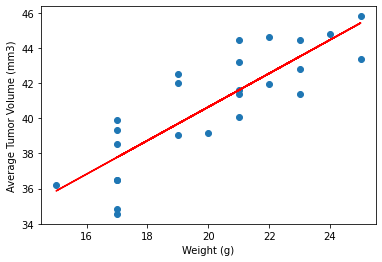

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Using ANSI to get color formatting as shown in example
correlation = st.pearsonr(avgCapomulinVol['Weight (g)'],avgCapomulinVol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight \033[34mand\033[0m the average tumor volume \033[34mis\033[0m \033[31m{round(correlation[0],2)}\033[0m")

# Creating Plot for scatter and adding line
(slope, intercept,rvalue, pvalue, stderr) = linregress(avgCapomulinVol['Weight (g)'],avgCapomulinVol['Tumor Volume (mm3)'])
regress = avgCapomulinVol['Weight (g)']* slope + intercept
lineEQ = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avgCapomulinVol['Weight (g)'],avgCapomulinVol['Tumor Volume (mm3)'])
plt.plot(avgCapomulinVol['Weight (g)'], regress, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


    
